# Classification with different Machine learning algorithms (Traditional)

# importing libraries

In [172]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.metrics import classification_report
from skimage.feature import greycomatrix, greycoprops

from sklearn import tree

# 

In [173]:
dire="D:/datafordemoczu/demoforaug/exactcroped"
categories= ['Beech', 'linden', 'Maple', 'Pine']

data =[]
SIZE = 200
images =[]
label1 =[]
for category in categories:
    path = os.path.join(dire, category)
    label = categories.index(category)
    
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        tree_img = cv2.imread(imgpath,0)
        try:
            tree_img = cv2.resize(tree_img, (SIZE, SIZE)) #Resize images
            #tree_img = cv2.resize(tree_img,(50,50))
            image = np.array(tree_img).flatten()
        
            #data.append([image, label])
            images.append(tree_img)
            label1.append(label)
        except Exception as e:
            pass
images=np.array(images)  

In [174]:
print(label1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

# Feature and label

In [175]:
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image, :,:]
        
        #Full image
        #GLCM = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = greycomatrix(img, [1], [0])       
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr
        
        GLCM2 = greycomatrix(img, [3], [0])       
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = greycomatrix(img, [5], [0])       
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3
        
        GLCM4 = greycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
        GLCM5 = greycomatrix(img, [0], [np.pi/2])       
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        
        #Add more filters as needed
        #entropy = shannon_entropy(img)
        #df['Entropy'] = entropy

        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [176]:
#Extract features from images
image_features = feature_extractor(images)
X_for_ML =image_features


# Train and test data split 

In [177]:
#train test

x1train, x1test, ytrain, ytest = train_test_split(X_for_ML, label1, test_size =0.25)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrain = scaler.fit_transform(x1train)
xtest = scaler.fit_transform(x1test)



# Machine learning Algorithms

## Random Forest Classifier

In [178]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 40)
classifier.fit(xtrain, ytrain)

print("Accuracy on training set: {:.3f}".format(classifier.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(classifier.score(xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.742


In [179]:
pprint(classifier.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [180]:
classifier1 = RandomForestClassifier(max_depth=5, n_estimators=55, random_state=0)
classifier1.fit(xtrain, ytrain)

print("Accuracy on training set: {:.3f}".format(classifier1.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(classifier1.score(xtest, ytest)))

Accuracy on training set: 0.865
Accuracy on test set: 0.701


In [181]:
from sklearn.metrics import classification_report
predictions = classifier1.predict(xtest)
print (classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.50      0.18      0.27        11
           2       0.63      0.84      0.72        37
           3       0.67      0.56      0.61        32

    accuracy                           0.70        97
   macro avg       0.70      0.65      0.65        97
weighted avg       0.69      0.70      0.68        97



In [182]:
pprint(classifier1.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 55,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


<AxesSubplot:>

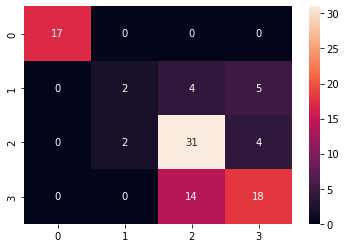

In [183]:
matrix= confusion_matrix(ytest, predictions)

sns.heatmap(matrix,annot = True, fmt = "d")

In [184]:
# Train model multiple times to find the highest accuracy
best = 0
for _ in range(20):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size = 0.25)

    classifier = RandomForestClassifier(max_depth=10, n_estimators=40, random_state=0)
    classifier.fit(xtrain, ytrain)

    
    acc = classifier.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(classifier, f)
print("Highest Accuracy:", best)

Accuracy: 0.6701030927835051
Accuracy: 0.7835051546391752
Accuracy: 0.7422680412371134
Accuracy: 0.7628865979381443
Accuracy: 0.7628865979381443
Accuracy: 0.7010309278350515
Accuracy: 0.6804123711340206
Accuracy: 0.7525773195876289
Accuracy: 0.7010309278350515
Accuracy: 0.7731958762886598
Accuracy: 0.7319587628865979
Accuracy: 0.7731958762886598
Accuracy: 0.7835051546391752
Accuracy: 0.6907216494845361
Accuracy: 0.7422680412371134
Accuracy: 0.8041237113402062
Accuracy: 0.7319587628865979
Accuracy: 0.7938144329896907
Accuracy: 0.7422680412371134
Accuracy: 0.6907216494845361
Highest Accuracy: 0.8041237113402062


## K-Neighbors 

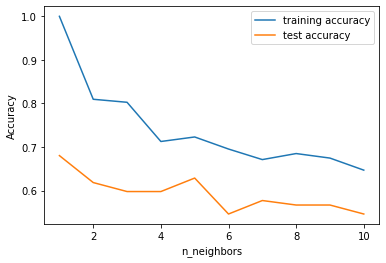

In [185]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(xtrain, ytrain)
    # record training set accuracy
    training_accuracy.append(knn.score(xtrain, ytrain))
    # record test set accuracy
    test_accuracy.append(knn.score(xtest, ytest))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [186]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain, ytrain)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(xtrain, ytrain)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(xtest, ytest)))

Accuracy of K-NN classifier on training set: 0.71
Accuracy of K-NN classifier on test set: 0.60


In [187]:
pprint(knn.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}


In [188]:
predictions1 = knn.predict(xtest)
print (classification_report(ytest, predictions1))

              precision    recall  f1-score   support

           0       0.75      0.63      0.69        19
           1       0.33      0.23      0.27        13
           2       0.71      0.73      0.72        41
           3       0.43      0.54      0.48        24

    accuracy                           0.60        97
   macro avg       0.56      0.53      0.54        97
weighted avg       0.60      0.60      0.60        97



<AxesSubplot:>

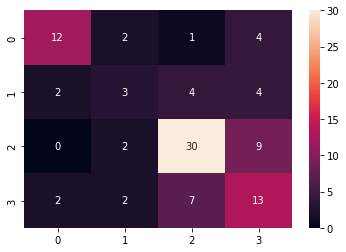

In [189]:
matrix_knn= confusion_matrix(ytest, predictions1)

sns.heatmap(matrix_knn,annot = True, fmt = "d")

In [190]:
# Train model multiple times to find the highest accuracy
best = 0
for _ in range(20):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size = 0.25)

    knn = KNeighborsClassifier(n_neighbors=4)
    knn.fit(xtrain, ytrain)

    
    acc = knn.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(knn, f)
print("Highest Accuracy:", best)

Accuracy: 0.5670103092783505
Accuracy: 0.5979381443298969
Accuracy: 0.6391752577319587
Accuracy: 0.5670103092783505
Accuracy: 0.5876288659793815
Accuracy: 0.5979381443298969
Accuracy: 0.6185567010309279
Accuracy: 0.5360824742268041
Accuracy: 0.4948453608247423
Accuracy: 0.6391752577319587
Accuracy: 0.5670103092783505
Accuracy: 0.5979381443298969
Accuracy: 0.5360824742268041
Accuracy: 0.5979381443298969
Accuracy: 0.5051546391752577
Accuracy: 0.5463917525773195
Accuracy: 0.6494845360824743
Accuracy: 0.5463917525773195
Accuracy: 0.6185567010309279
Accuracy: 0.5876288659793815
Highest Accuracy: 0.6494845360824743


# Decision Tree

In [191]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier(random_state=0)
d_tree.fit(xtrain, ytrain)
print("Accuracy on training set: {:.3f}".format(d_tree.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(d_tree.score(xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.763


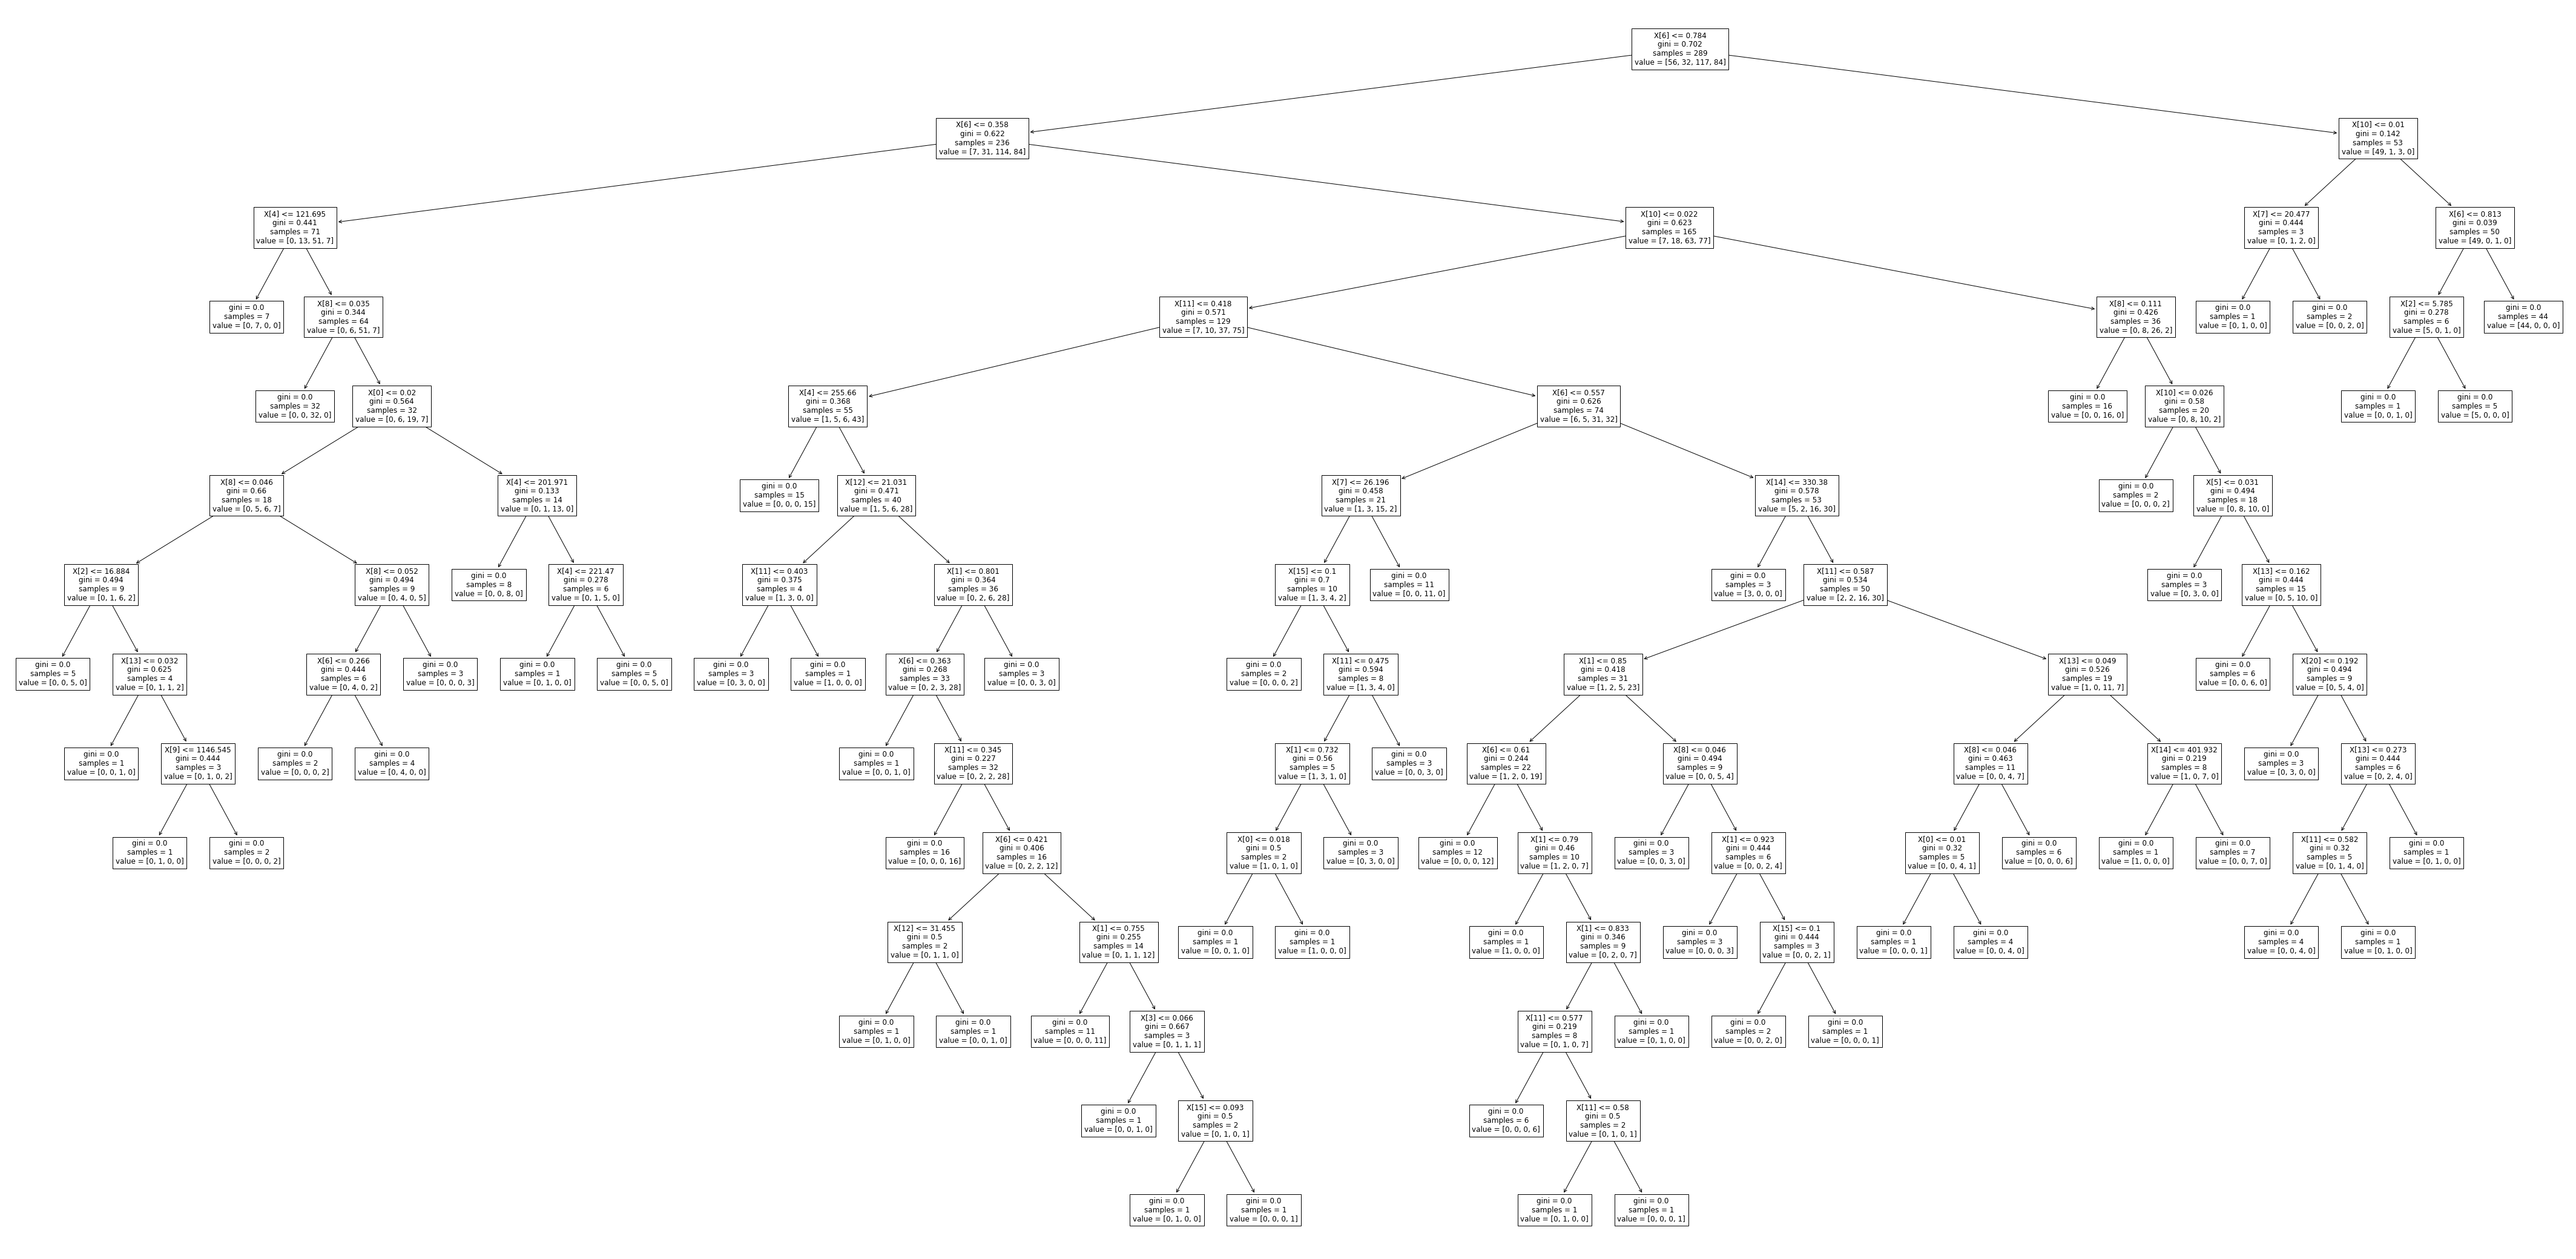

In [192]:
plt.figure(figsize=(76,38))
tree.plot_tree(d_tree)
plt.show()

In [193]:
pprint(d_tree.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}


In [194]:
d_tree1 = DecisionTreeClassifier(max_depth=10, random_state=0,  max_leaf_nodes = 35)
d_tree1.fit(xtrain, ytrain)

print("Accuracy on training set: {:.3f}".format(d_tree1.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(d_tree1.score(xtest, ytest)))


Accuracy on training set: 0.938
Accuracy on test set: 0.742


In [195]:
pprint(d_tree1.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': 35,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}


In [196]:
predictionsdecision = d_tree1.predict(xtest)
print (classification_report(ytest, predictionsdecision))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.57      0.25      0.35        16
           2       0.76      0.83      0.80        42
           3       0.60      0.71      0.65        21

    accuracy                           0.74        97
   macro avg       0.72      0.70      0.69        97
weighted avg       0.73      0.74      0.72        97



<AxesSubplot:>

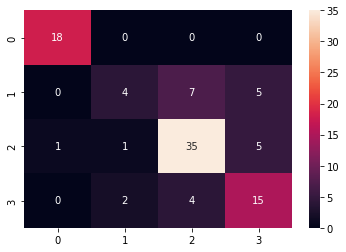

In [197]:
matrix_tree= confusion_matrix(ytest, predictionsdecision)

sns.heatmap(matrix_tree,annot = True, fmt = "d")

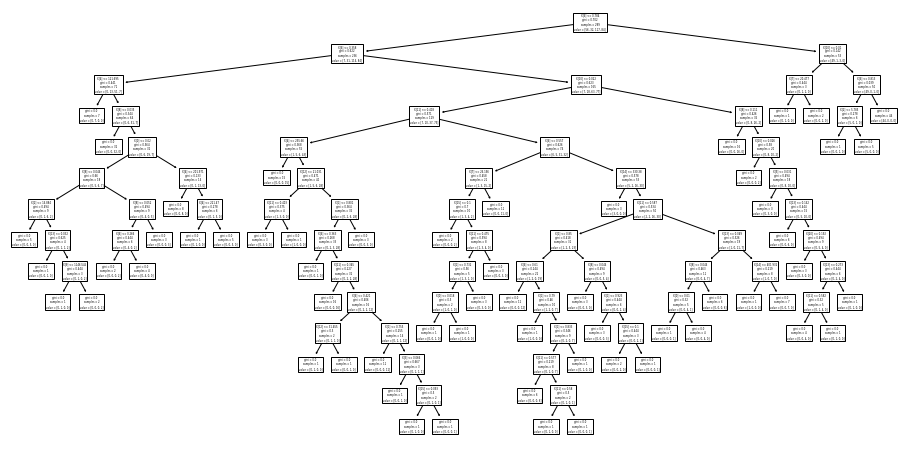

In [198]:
plt.figure(figsize=(16,8))
tree.plot_tree(d_tree)
plt.show()

In [199]:
best = 0
for _ in range(20):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size = 0.25)

    tree = DecisionTreeClassifier(max_depth=10, random_state=0,  max_leaf_nodes = 15)
    tree.fit(xtrain, ytrain)


    
    acc = tree.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(tree, f)
print("Highest Accuracy:", best)

Accuracy: 0.6597938144329897
Accuracy: 0.6804123711340206
Accuracy: 0.6597938144329897
Accuracy: 0.6907216494845361
Accuracy: 0.5670103092783505
Accuracy: 0.7010309278350515
Accuracy: 0.711340206185567
Accuracy: 0.7010309278350515
Accuracy: 0.7010309278350515
Accuracy: 0.6701030927835051
Accuracy: 0.7216494845360825
Accuracy: 0.6494845360824743
Accuracy: 0.6701030927835051
Accuracy: 0.6494845360824743
Accuracy: 0.6597938144329897
Accuracy: 0.7628865979381443
Accuracy: 0.6804123711340206
Accuracy: 0.6701030927835051
Accuracy: 0.7319587628865979
Accuracy: 0.6597938144329897
Highest Accuracy: 0.7628865979381443


# Gradient Boost

In [200]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(xtrain, ytrain)

print("Accuracy on training set: {:.3f}".format(gb.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gb.score(xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.732


In [201]:
pprint(gb.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [202]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=2)
gb1.fit(xtrain, ytrain)

print("Accuracy on training set: {:.3f}".format(gb1.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gb1.score(xtest, ytest)))


Accuracy on training set: 0.990
Accuracy on test set: 0.701


In [203]:
pprint(gb1.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [204]:
gb2 = GradientBoostingClassifier(random_state=0, max_depth=2, learning_rate=0.01)
gb2.fit(xtrain, ytrain)

print("Accuracy on training set: {:.3f}".format(gb2.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gb2.score(xtest, ytest)))


Accuracy on training set: 0.768
Accuracy on test set: 0.608


In [205]:
predictionsgb1 = gb1.predict(xtest)
print (classification_report(ytest, predictionsgb1))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.38      0.27      0.32        11
           2       0.63      0.82      0.71        33
           3       0.78      0.62      0.69        34

    accuracy                           0.70        97
   macro avg       0.67      0.65      0.65        97
weighted avg       0.70      0.70      0.69        97



In [206]:
pprint(gb1.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


<AxesSubplot:>

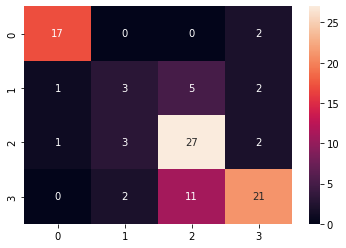

In [207]:
matrix_gb1= confusion_matrix(ytest, predictionsgb1)

sns.heatmap(matrix_gb1,annot = True, fmt = "d")

In [208]:
best = 0
for _ in range(20):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size = 0.25)

    gb2 = GradientBoostingClassifier(random_state=0, max_depth=2)
    gb2.fit(xtrain, ytrain)



    
    acc = tree.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(gb1, f)
print("Highest Accuracy:", best)

Accuracy: 0.8350515463917526
Accuracy: 0.8144329896907216
Accuracy: 0.7938144329896907
Accuracy: 0.8144329896907216
Accuracy: 0.7628865979381443
Accuracy: 0.7422680412371134
Accuracy: 0.7422680412371134
Accuracy: 0.845360824742268
Accuracy: 0.7731958762886598
Accuracy: 0.7628865979381443
Accuracy: 0.8350515463917526
Accuracy: 0.8247422680412371
Accuracy: 0.7835051546391752
Accuracy: 0.8247422680412371
Accuracy: 0.7422680412371134
Accuracy: 0.8350515463917526
Accuracy: 0.7731958762886598
Accuracy: 0.7835051546391752
Accuracy: 0.8144329896907216
Accuracy: 0.8041237113402062
Highest Accuracy: 0.845360824742268


# Support Vector Machine

In [209]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(xtrain, ytrain)

print("Accuracy on training set: {:.2f}".format(svc.score(xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(svc.score(xtest, ytest)))

Accuracy on training set: 0.48
Accuracy on test set: 0.51


In [210]:
svc1 = SVC(C= 1.3, degree= 65, max_iter=4)
svc1.fit(xtrain, ytrain)

print("Accuracy on training set: {:.2f}".format(svc.score(xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(svc.score(xtest, ytest)))

Accuracy on training set: 0.48
Accuracy on test set: 0.51


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [211]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.fit_transform(xtest)

svc4 = SVC(C= 1.3, degree= 45, max_iter=10)
svc4.fit(X_train_scaled, ytrain)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, ytrain)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, ytest)))

Accuracy on training set: 0.204
Accuracy on test set: 0.155


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [212]:
pprint(svc4.get_params())

{'C': 1.3,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 45,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': 10,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [213]:
predictionssvm = svc.predict(xtest)
print (classification_report(ytest, predictionssvm))

              precision    recall  f1-score   support

           0       0.39      0.87      0.54        15
           1       0.00      0.00      0.00        12
           2       0.56      0.78      0.65        46
           3       0.00      0.00      0.00        24

    accuracy                           0.51        97
   macro avg       0.24      0.41      0.30        97
weighted avg       0.33      0.51      0.39        97



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

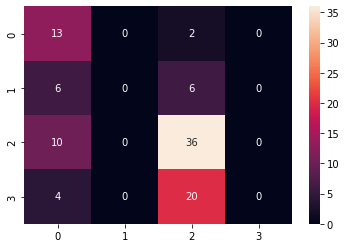

In [214]:
matrix_svm= confusion_matrix(ytest, predictionssvm)

sns.heatmap(matrix_svm,annot = True, fmt = "d")

In [215]:
best = 0
for _ in range(20):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size = 0.25)

    svc = SVC(C= 4.3)
    svc.fit(xtrain, ytrain)


    
    acc = tree.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(svc, f)
print("Highest Accuracy:", best)

Accuracy: 0.8144329896907216
Accuracy: 0.8041237113402062
Accuracy: 0.7938144329896907
Accuracy: 0.845360824742268
Accuracy: 0.7835051546391752
Accuracy: 0.7319587628865979
Accuracy: 0.7731958762886598
Accuracy: 0.8762886597938144
Accuracy: 0.7731958762886598
Accuracy: 0.8247422680412371
Accuracy: 0.8144329896907216
Accuracy: 0.8865979381443299
Accuracy: 0.8041237113402062
Accuracy: 0.7835051546391752
Accuracy: 0.7938144329896907
Accuracy: 0.8247422680412371
Accuracy: 0.7319587628865979
Accuracy: 0.7628865979381443
Accuracy: 0.8144329896907216
Accuracy: 0.8041237113402062
Highest Accuracy: 0.8865979381443299


# Gaussian Naive Bayes

In [216]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB(var_smoothing= 1e-16)
model.fit(xtrain, ytrain)

y_pred_nb = model.predict(xtest)
print(y_pred_nb)


print("Accuracy on training set: {:.2f}".format(model.score(xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(model.score(xtest, ytest)))

[2 3 3 3 1 2 3 1 3 0 1 3 2 0 3 3 3 3 3 3 0 0 1 0 1 0 3 2 3 3 1 2 2 3 3 1 0
 3 3 3 3 3 3 3 3 1 3 3 3 3 3 1 2 3 0 3 3 3 3 0 3 2 3 2 3 3 0 3 0 3 1 3 2 0
 3 1 3 0 1 3 1 3 0 2 3 3 1 3 0 2 3 0 2 1 1 2 3]
Accuracy on training set: 0.55
Accuracy on test set: 0.57


In [217]:

print (classification_report(ytest, y_pred_nb))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72        20
           1       0.38      0.60      0.46        10
           2       0.86      0.32      0.46        38
           3       0.47      0.83      0.60        29

    accuracy                           0.57        97
   macro avg       0.63      0.60      0.56        97
weighted avg       0.68      0.57      0.56        97



<AxesSubplot:>

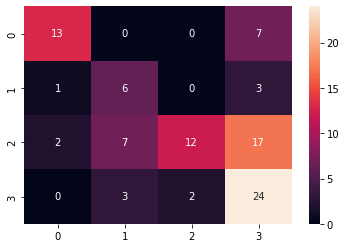

In [218]:
matrix_nb= confusion_matrix(ytest, y_pred_nb)

sns.heatmap(matrix_nb,annot = True, fmt = "d")

In [219]:
pprint(model.get_params())

{'priors': None, 'var_smoothing': 1e-16}


In [220]:
score_nb = round(accuracy_score(y_pred_nb,ytest)*100,2)

print("The accuracy score using Naive Bayes is: "+str(score_nb)+" %")


The accuracy score using Naive Bayes is: 56.7 %


In [221]:
best = 0
for _ in range(20):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size = 0.25)

    model=GaussianNB()
    model.fit(xtrain, ytrain)


    
    acc = tree.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(model, f)
print("Highest Accuracy:", best)

Accuracy: 0.7835051546391752
Accuracy: 0.7422680412371134
Accuracy: 0.8041237113402062
Accuracy: 0.7319587628865979
Accuracy: 0.7319587628865979
Accuracy: 0.8041237113402062
Accuracy: 0.7938144329896907
Accuracy: 0.7938144329896907
Accuracy: 0.7010309278350515
Accuracy: 0.7216494845360825
Accuracy: 0.8041237113402062
Accuracy: 0.8041237113402062
Accuracy: 0.845360824742268
Accuracy: 0.7938144329896907
Accuracy: 0.7628865979381443
Accuracy: 0.7938144329896907
Accuracy: 0.8041237113402062
Accuracy: 0.7731958762886598
Accuracy: 0.8350515463917526
Accuracy: 0.7628865979381443
Highest Accuracy: 0.845360824742268


# Neural Networks

In [222]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(xtrain, ytrain)

print("Accuracy on training set: {:.2f}".format(mlp.score(xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(mlp.score(xtest, ytest)))

Accuracy on training set: 0.79
Accuracy on test set: 0.79


In [223]:
pprint(mlp.get_params())

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}


In [224]:
predictionsmlp = mlp.predict(xtest)
print (classification_report(ytest, predictionsmlp))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.00      0.00      0.00        12
           2       0.75      0.97      0.85        37
           3       0.81      0.78      0.79        27

    accuracy                           0.79        97
   macro avg       0.61      0.68      0.64        97
weighted avg       0.70      0.79      0.74        97



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

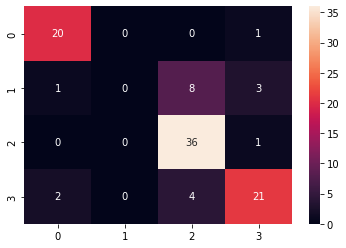

In [225]:
matrix_mlp= confusion_matrix(ytest, predictionsmlp)

sns.heatmap(matrix_mlp,annot = True, fmt = "d")

In [226]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.fit_transform(xtest)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, ytrain)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, ytrain)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, ytest)))

Accuracy on training set: 0.875
Accuracy on test set: 0.784


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [227]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, ytrain)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, ytrain)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, ytest)))

Accuracy on training set: 0.924
Accuracy on test set: 0.845


In [228]:
best = 0
for _ in range(20):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size = 0.25)

    mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
    mlp.fit(X_train_scaled, ytrain)



    
    acc = tree.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(mlp, f)
print("Highest Accuracy:", best)

Accuracy: 0.7628865979381443
Accuracy: 0.8144329896907216
Accuracy: 0.7835051546391752
Accuracy: 0.7319587628865979
Accuracy: 0.8041237113402062
Accuracy: 0.7835051546391752
Accuracy: 0.7525773195876289
Accuracy: 0.8247422680412371
Accuracy: 0.865979381443299
Accuracy: 0.7628865979381443
Accuracy: 0.8556701030927835
Accuracy: 0.7835051546391752
Accuracy: 0.7835051546391752
Accuracy: 0.8041237113402062
Accuracy: 0.7525773195876289
Accuracy: 0.8041237113402062
Accuracy: 0.7731958762886598
Accuracy: 0.7938144329896907
Accuracy: 0.8247422680412371
Accuracy: 0.7835051546391752
Highest Accuracy: 0.865979381443299
